<a href="https://colab.research.google.com/github/jillianhaig/Project1_DS4002/blob/main/SCRIPTS/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/jillianhaig/Project1_DS4002 # so we can access data loaded from shared github
import pandas as pd

Cloning into 'Project1_DS4002'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 217 (delta 60), reused 6 (delta 6), pack-reused 117 (from 1)
Receiving objects: 100% (217/217), 18.96 MiB | 5.50 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [ ]:
disney_df = pd.read_csv("/content/Project1_DS4002/FinalDisneyDataset.csv")

In [ ]:
disney_df.head()

,rating,helpful,total,date,title,review,UniqueID,release_date,recent?,negative,positive,compound
0,10,79,96,2/23/2019,Everyone that rated this below a 7 are why ca...,Oh my god. This has to be the most misundersto...,Inside Out 2015,6/19/2015,0,0.141,0.184,0.9910
1,9,27,31,6/14/2019,I cried like a baby..\n,"I watched the movie long time ago, and I've ju...",Inside Out 2015,6/19/2015,0,0.132,0.187,0.7181
2,9,396,666,7/9/2016,I feel like everybody has missed the point\n,"I am not normally one to write reviews, but I ...",Inside Out 2015,6/19/2015,0,0.069,0.128,0.9703
3,10,42,67,5/28/2017,A brilliant depiction of adolescence\n,"As an adult, I love animated films but the tra...",Inside Out 2015,6/19/2015,0,0.122,0.206,0.9818
4,10,130,234,7/28/2018,How?\n,Wtf people. I was just reading like several on...,Inside Out 2015,6/19/2015,0,0.161,0.087,-0.8791


In [ ]:
# Filter for recent reviews
recent_reviews = disney_df[disney_df['recent?'] == 1]

# Calculate the average sentiment score for recent reviews
average_sentiment = recent_reviews['compound'].mean()

print("Average sentiment score for recent reviews:", average_sentiment)

Average sentiment score for recent reviews: 0.8070470488195278


In [ ]:
# Filter for recent reviews
not_recent_reviews = disney_df[disney_df['recent?'] == 0]

# Calculate the average sentiment score for recent reviews
average_sentiment2 = not_recent_reviews['compound'].mean()

print("Average sentiment score for not recent reviews:", average_sentiment2)

Average sentiment score for not recent reviews: 0.7724466124661247


In [ ]:
# t test
from scipy import stats

recent_scores = disney_df[disney_df['recent?'] == 1]['compound']
non_recent_scores = disney_df[disney_df['recent?'] == 0]['compound']

# Perform a one-tailed t-test
t_statistic, p_value = stats.ttest_ind(recent_scores, non_recent_scores, alternative='greater')

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Recent reviews have higher sentiment scores.")
else:
    print("Fail to reject the null hypothesis: No evidence that recent reviews have higher sentiment scores.")



T-statistic: 4.470993281987724
P-value: 3.9204351641986045e-06
Reject the null hypothesis: Recent reviews have higher sentiment scores.


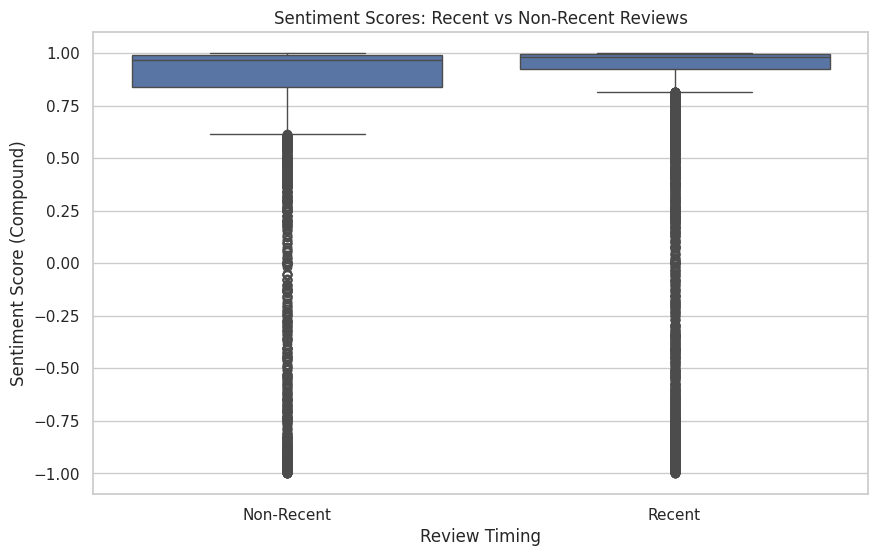

In [ ]:
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='recent?', y='compound', data=disney_df)
plt.xticks([0, 1], ['Non-Recent', 'Recent'])
plt.title('Sentiment Scores: Recent vs Non-Recent Reviews')
plt.ylabel('Sentiment Score (Compound)')
plt.xlabel('Review Timing')
plt.show()

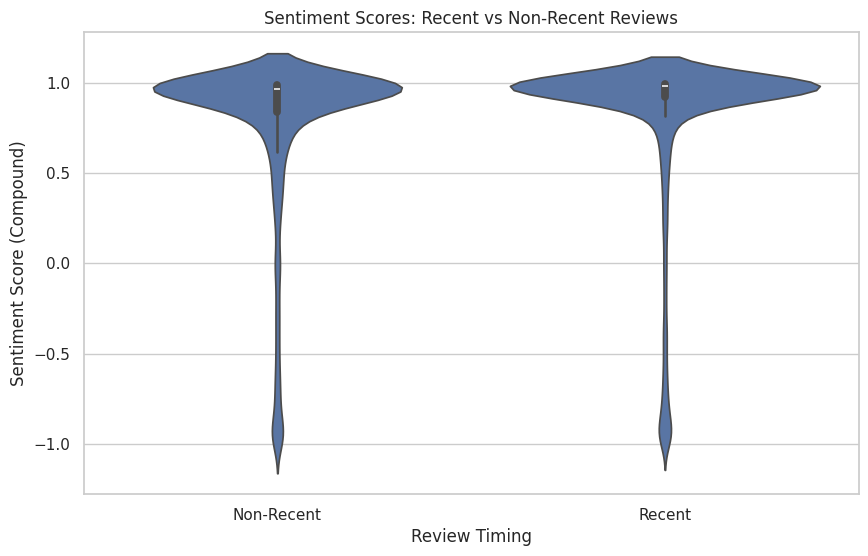

In [ ]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='recent?', y='compound', data=disney_df)
plt.xticks([0, 1], ['Non-Recent', 'Recent'])
plt.title('Sentiment Scores: Recent vs Non-Recent Reviews')
plt.ylabel('Sentiment Score (Compound)')
plt.xlabel('Review Timing')
plt.show()

<ipython-input-12-74000343f6d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recent?', y='compound', data=mean_scores, palette='Blues')


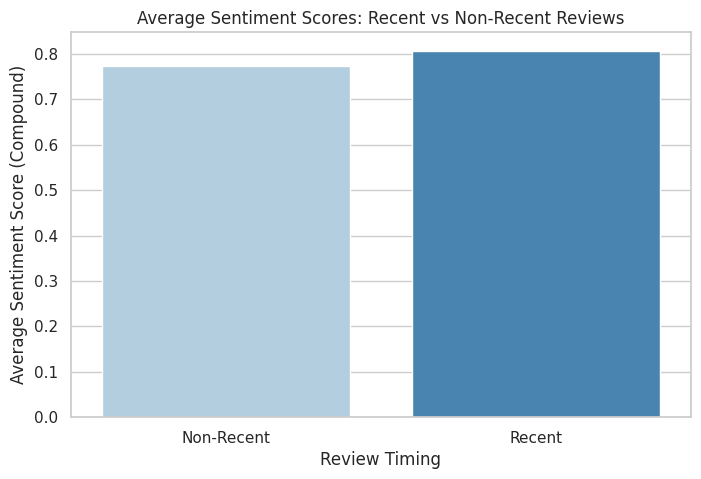

In [ ]:
# bar plot for mean sentiment scores
mean_scores = disney_df.groupby('recent?')['compound'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='recent?', y='compound', data=mean_scores, palette='Blues')
plt.xticks([0, 1], ['Non-Recent', 'Recent'])
plt.title('Average Sentiment Scores: Recent vs Non-Recent Reviews')
plt.ylabel('Average Sentiment Score (Compound)')
plt.xlabel('Review Timing')
plt.show()

In [ ]:
import statsmodels.api as sm

# Load your dataset
# df = pd.read_csv('your_file.csv')

# Define the independent variable (X) and dependent variable (y)
X = disney_df['recent?']
y = disney_df['compound']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the R-squared value
r_squared = model.rsquared
print("R-squared:", r_squared)

# Print the summary of the regression
print(model.summary())

R-squared: 0.0012855999784692207
                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.99
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           7.84e-06
Time:                        00:19:29   Log-Likelihood:                -10040.
No. Observations:               15531   AIC:                         2.008e+04
Df Residuals:                   15529   BIC:                         2.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.77

In [ ]:
# Calculate confidence intervals
recent_mean = disney_df[disney_df['recent?'] == 1]['compound'].mean()
non_recent_mean = disney_df[disney_df['recent?'] == 0]['compound'].mean()

recent_ci = stats.t.interval(0.95, len(disney_df[disney_df['recent?'] == 1])-1, loc=recent_mean, scale=stats.sem(disney_df[disney_df['recent?'] == 1]['compound']))
non_recent_ci = stats.t.interval(0.95, len(disney_df[disney_df['recent?'] == 0])-1, loc=non_recent_mean, scale=stats.sem(disney_df[disney_df['recent?'] == 0]['compound']))

print("Recent CI:", recent_ci)
print("Non-Recent CI:", non_recent_ci)

Recent CI: (0.7980045936928815, 0.8160895039461742)
Non-Recent CI: (0.7602425369625382, 0.7846506879697112)


In [ ]:
# since there is no overlap in these intervals we can be sure that the difference if statistically significant

<ipython-input-16-e60c6b727077>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Mean', data=plot_data, palette='Blues', capsize=.1)


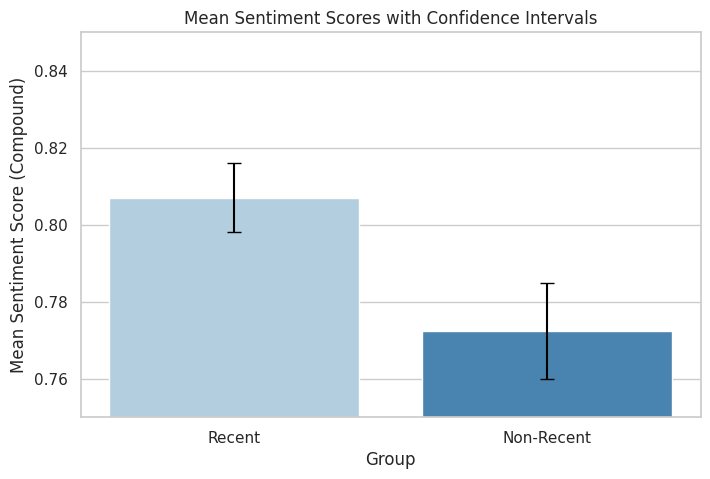

In [ ]:
# visualize the confidence interval
import numpy as np

# Calculate means and confidence intervals
mean_recent = disney_df[disney_df['recent?'] == 1]['compound'].mean()
mean_non_recent = disney_df[disney_df['recent?'] == 0]['compound'].mean()
ci_recent = (0.798, 0.816)  # Replace with your calculated CIs
ci_non_recent = (0.760, 0.785)

means = [mean_recent, mean_non_recent]
cis = [ci_recent, ci_non_recent]

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Group': ['Recent', 'Non-Recent'],
    'Mean': means,
    'CI_Lower': [ci[0] for ci in cis],
    'CI_Upper': [ci[1] for ci in cis]
})

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Mean', data=plot_data, palette='Blues', capsize=.1)
plt.errorbar(x=plot_data['Group'], y=plot_data['Mean'],
             yerr=[plot_data['Mean'] - plot_data['CI_Lower'],
                    plot_data['CI_Upper'] - plot_data['Mean']],
             fmt='none', c='black', capsize=5)

plt.title('Mean Sentiment Scores with Confidence Intervals')
plt.ylabel('Mean Sentiment Score (Compound)')
plt.ylim(0.75, 0.85)  # Adjust y-axis limits as needed
plt.show()